In [ ]:
# ! pip install PyPDF2

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.patches as patches
# from matplotlib.font_manager import FontProperties
from pypinyin import pinyin, Style
import numpy as np
from datetime import datetime
import os

import os
from PyPDF2 import PdfMerger 



# Helper function

In [2]:
def draw_grid(ax, length, position):
    x, y = position
    # y += length 

    # 画四个边框
    ax.plot([x, x+length], [y, y], 'g-', linewidth=0.5)  # 上
    ax.plot([x, x+length], [y-length, y-length], 'g-', linewidth=0.5)  # 下
    ax.plot([x, x], [y, y-length], 'g-', linewidth=0.5)  # 左
    ax.plot([x+length, x+length], [y, y-length], 'g-', linewidth=0.5)  # 右

    # 画中间的线，使用虚线
    ax.plot([x, x+length], [y-length/2, y-length/2], 'g--', alpha=0.5, linewidth=0.5)  # 横
    ax.plot([x+length/2, x+length/2], [y, y-length], 'g--', alpha=0.5, linewidth=0.5)  # 纵
    
def clean_pinyin(pronunciations, article):
    result = []
    for pronu in pronunciations:
        
        if (not pronu[0].isalnum()) and (len(pronu[0]) > 1):
            # print("pronu", pronu)
            for p in pronu[0]:
                result.append(p)
                # print("result[-1]:", repr(result[-1]))
                # result.append(pronu[0][1])
            continue
        
        if '\n' in pronu[0] and len(pronu[0]) > 1:
            
            result.append(pronu[0][0])
            result.append(pronu[0][1])
            continue
            
        if ' ' in pronu[0] and len(pronu[0]) > 1:

            result.append(pronu[0][0])
            result.append(pronu[0][1])
            continue               
         # Add the current string to the result list
        result.append([pronu[0]])
        
    pos = article.find("[")
    if (pos > -1):
        # print("pos:", pos, pronunciations[pos])
        if  (result[pos] != '['):
            result.insert(pos, '[')
    return result

def merge_pdf_list(page_list, merged_name=""):
    merger = PdfMerger()
    for page in page_list:  # iterate through files in folder
        if page.endswith('.pdf'):  # check for ".pdf" extension
            # print(page)
            merger.append(page)  # add each pdf to merger
 
    merger.write(merged_name)  # write the merged pdfs to output
    merger.close()
    
def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True

def draw_tian_zi_ge_page():
    fig, ax = plt.subplots(figsize=(width_inch, height_inch))
    global curernt_page
    curernt_page += 1
    
    ax.axis('equal')  # 使 x 轴和 y 轴的单位长度相等
    ax.set_xlim([0, width_inch])
    ax.set_ylim([0, height_inch])
 
    ax.axis('off')
    
    for r in range(page_row_cnt):
        for c in range(page_col_cnt):
            grid_x = start_x + c * grid_width
            grid_y = height_inch - start_y - (r * (grid_width + space_v))  # (height_inch - start_y )
                    # print(f"Row: {r1}, col: {c}, grid_x: {grid_x:0.2f}, grid_y: {grid_y:0.2f}")
            draw_grid(ax, grid_width, (grid_x, grid_y))
    plt.tight_layout()
    
    ax.text(x = 7.5, y=10.7, s=f"{curernt_page} 页", fontsize=10,  color='black', alpha=0.7)
    return fig, ax

# 生成田字格

Article len: 156, Pinyin len: 156


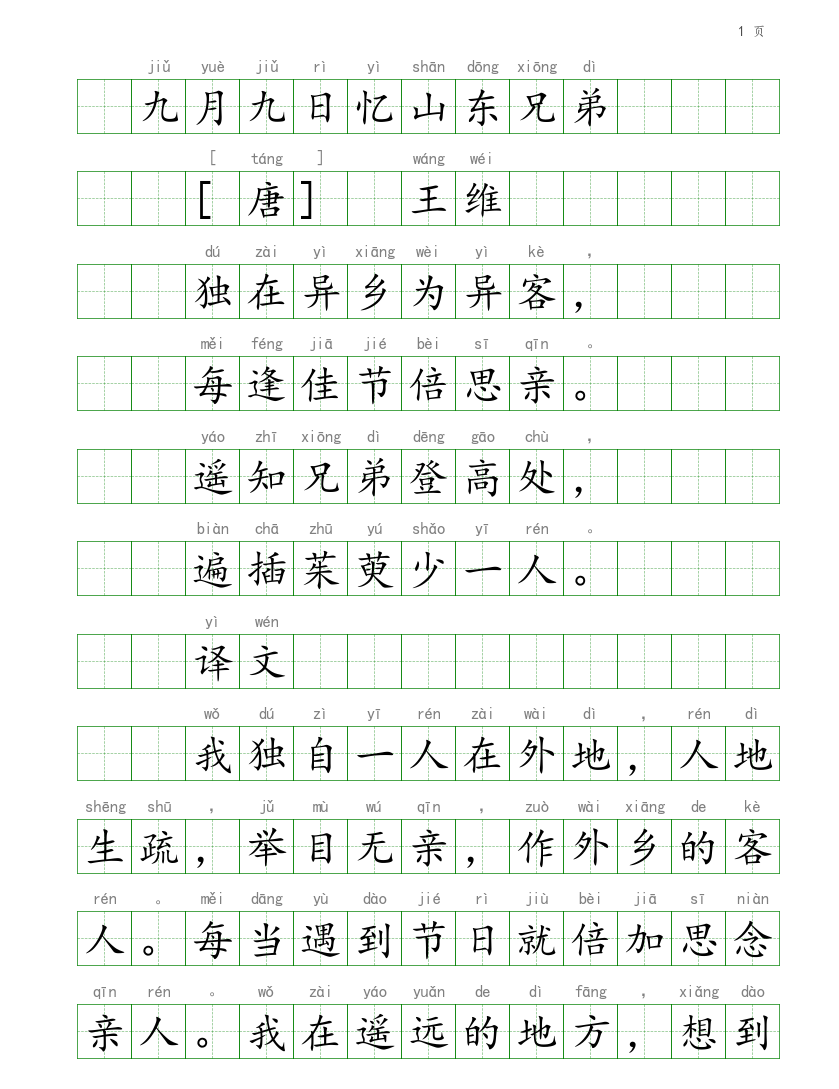

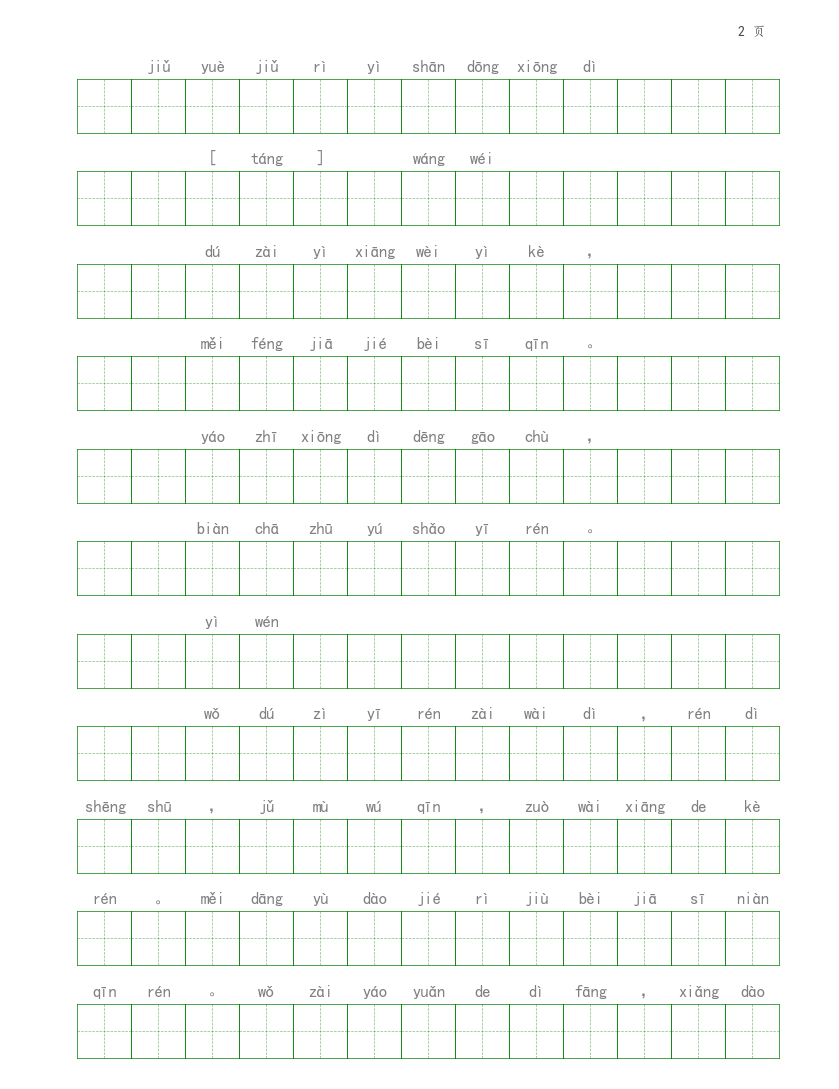

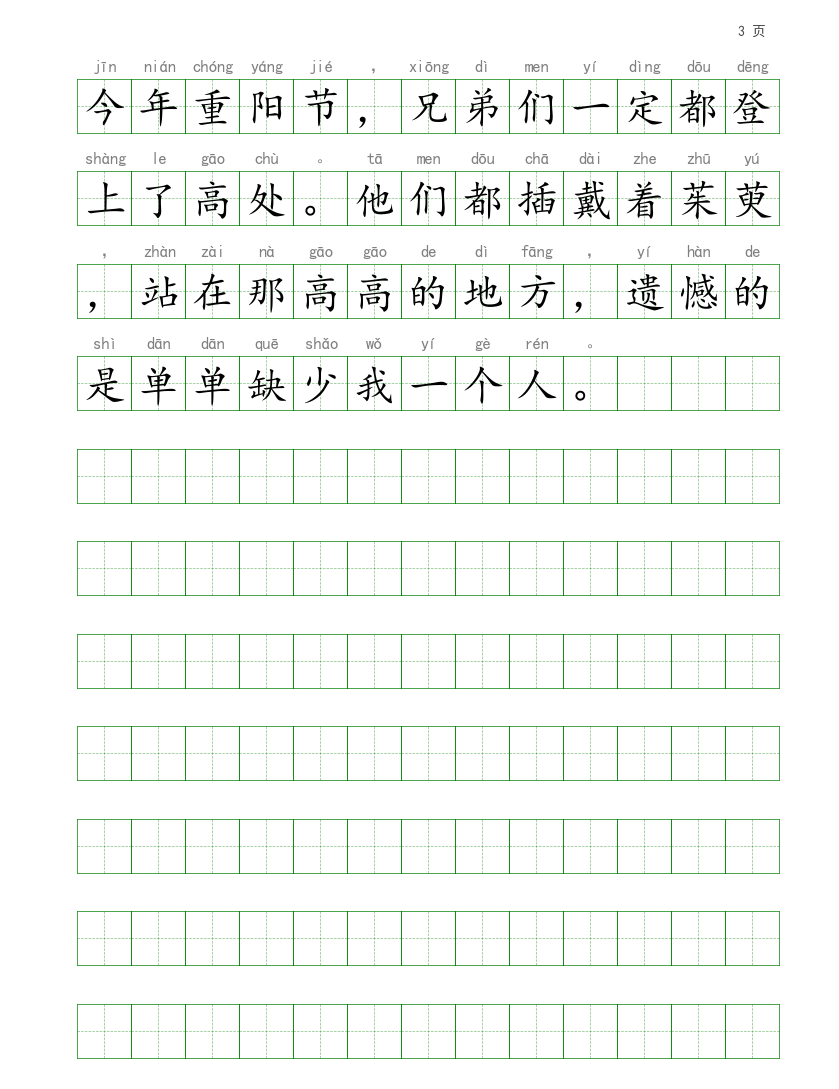

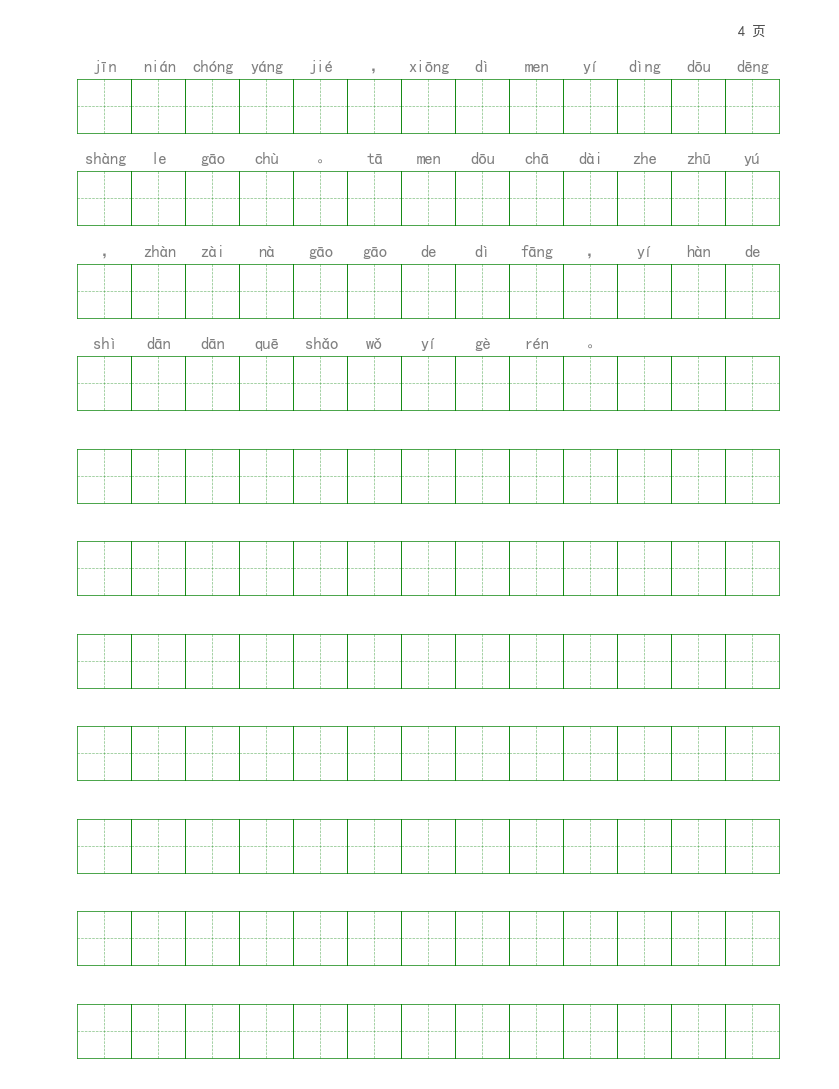

In [7]:


 
article = """观潮

钱塘江大潮，自古以来被称为天下奇观。

农历八月十八是一年一度的观潮日。这一天早上，我们来到了海宁市的盐官镇，据说这里是观潮最好的地方。我们随着观潮的人群，登上了海塘大堤。宽阔的钱塘江横卧在眼前。江面很平静，越往东越宽，在雨后的阳光下，笼罩着一层蒙蒙的薄雾。镇海古塔、中山亭和观潮台屹立在江边。远处，几座小山在云雾中若隐若现。江潮还没有来，海塘大堤上早已人山人海。大家昂首东望，等着，盼着。

午后一点左右，从远处传来隆隆的响声，好像闷雷滚动。顿时人声鼎沸，有人告诉我们，潮来了！我们踮着脚往东望去，江面还是风平浪静，看不出有什么变化。过了一会儿，响声越来越大，只见东边水天相接的地方出现了一条白线，人群又沸腾起来。

那条白线很快地向我们移来，逐渐拉长，变粗，横贯江面。再近些，只见白浪翻滚，形成一堵两丈多高的水墙。浪潮越来越近，犹如千万匹白色战马齐头并进，浩浩荡荡地飞奔而来；那声音如同山崩地裂，好像大地都被震得颤动起来。

霎时，潮头奔腾西去，可是余波还在漫天卷地般涌来，江面上依旧风号浪吼。过了好久，钱塘江才恢复了平静。看看堤下，江水已经涨了两丈来高了。
"""

article = """四时田园杂兴(其二十五)

[宋] 范成大

梅子金黄杏子肥，

麦花雪白菜花稀。

日长篱落无人过，

惟有蜻蜓蛱蝶飞。
"""

article = """扁鹊治病

有一天，名医扁鹊去拜见蔡桓侯。

扁鹊在蔡桓侯身边站了一会儿，说：“据我看来，您皮肤上有点儿小病。要是不治，恐怕会向体内发展。”蔡桓侯说：“我的身体很好，什么病也没有。”扁鹊走后，蔡桓侯对左右的人说：“这些做医生的，总喜欢给没有病的人治病。医治没有病的人，才容易显示自己的高明！”

过了十天，扁鹊又来拜见蔡桓侯，说道：“您的病已经发展到皮肉之间了，要是不治还会加深。”蔡桓侯听了很不高兴，没有理睬他。扁鹊又退了出去。

十天后，扁鹊再一次来拜见，对蔡桓侯说：“您的病已经发展到肠胃里，再不治会更加严重。”蔡桓侯听了非常不高兴。扁鹊连忙退了出去。

又过了十天，扁鹊老远望见蔡桓侯，只看了几眼，就掉头跑了。蔡桓侯觉得奇怪，派人去问他：“扁鹊，你这次见了蔡桓侯，为什么一声不响就跑掉了？”扁鹊解释道：“皮肤上的病用热敷就能够治好；发展到皮肉之间，用扎针的方法可以治好；即使发展到肠胃里，服几剂汤药也还能治好；一旦深入骨髓，只能等死，医生再也无能为力了。现在蔡桓侯的病已经深入骨髓，所以我不再请求给他医治！”

五天之后，蔡桓侯浑身疼痛，派人去请扁鹊给他治病。扁鹊早知道蔡桓侯要来请他，几天前就跑到秦国去了。不久，蔡桓侯病死了。

 

纪昌学射

飞卫是一名射箭能手。有个叫纪昌的人，想学习射箭，就去向飞卫请教。

开始练习的时候，飞卫对纪昌说：“你要想学会射箭，首先应该下功夫练眼力。你要牢牢地盯住一个目标，不能眨一眨！”纪昌回家之后，就开始练习起来。妻子织布的时候，他躺在织布机下面，睁大眼睛，死死盯住织布机的踏板。两年以后，纪昌的本领练得相当到家了——就是锋利的锥尖要刺到眼角了，他的眼睛也不眨一下。

纪昌对自己的成绩感到很满意，以为练得差不多了，就再次去拜见飞卫。飞卫对他说：“虽然你已经取得了不小的成绩，但你的眼力还不够。你要练到把极小的东西看得很大，把模糊难辨的东西看得很清楚，那时候再来见我。纪昌记住了飞卫的话，回到家里，又开始练习起来。他用一根牛尾毛拴住一只虱子，把它吊在窗口，然后每天站在虱子旁边，聚精会神地盯着它。那只小虱子，在纪昌的眼里一天天大起来，练到后来，大得竟然像车轮一样。

取得了这样大的进步，纪昌赶紧跑到飞卫那里，报告了这个好消息。飞卫高兴地说：“你就要成功了！” 于是，飞卫开始教他怎样开弓，怎样放箭。

后来，纪昌成了百发百中的射箭能手。

"""

article = """纸的发明

造纸术的发明，是中国对世界文明的伟大贡献之一。

早在几千年前，我们的祖先就创造了文字。可那时候还没有纸，要记录一件事情，就用刀把文字刻在龟甲和兽骨上，或者把文字铸刻在青铜器上。后来，人们又把文字刻在竹片和木片上。这些竹片、木片用绳子穿起来，就成了一册书。但是，这种书很笨重，阅读、携带、保存都很不方便。古时候用“学富五车”形容一个人学问高，是因为书多的时候需要用车来拉。再后来，有了蚕丝织成的帛，就可以在帛上写字了。帛比竹片、木片轻便，但是价钱太贵，只有少数人能用，不能普及。

人们用蚕茧制作丝绵时发现，盛放蚕茧的篾席上，会留下一层薄片，可用于书写。考古学家发现，在两千年多年前的西汉时代，人们已经懂得了用麻来造纸。但麻纸比较粗糙，不便书写。

大约在一千九百年前的东汉时代，有个叫蔡伦的人，吸收了人们长期积累的经验，改进了造纸术。他把树皮、麻头、稻草、破布等原料剪碎或切断，浸在水里捣烂成浆；再把浆捞出来晒干，就成了一种既轻便又好用的纸。用这种方法造的纸，原料容易得到，可以大量制造，价格又便宜，能满足多数人的需要，所以这种造纸方法就传承下来了。

我国的造纸术首先传到邻近的朝鲜半岛和日本，后来又传到阿拉伯世界和欧洲，极大地促进了人类社会的进步和文化的发展，影响了全世界。
"""

article = """漏

从前，有一户人家：一个老公公，一个老婆婆，还喂着一头黑脊背、白胸脯的小胖驴。

山上住着一只老虎，山下住着一个贼。老虎嘴馋，一心想着吃这头小胖驴；贼手痒，一心想着偷这头小胖驴。

一天晚上，下着蒙蒙小雨。老虎来了，贼也来了。老虎用爪在墙壁上抓，贼用手在屋顶上挖，不一会儿，墙被老虎抓了个窟窿，屋顶被贼挖了个窟窿。老虎钻进驴圈，贼也正想往下跳。忽然，老公公和老婆婆在里屋说起话来，老虎和贼吓得大气都不敢出了。

老公公说：“好像有什么声音在响？”

老婆婆说：“唉!管他狼哩，管他虎哩，我什么都不怕，就怕漏！”

老虎趴在驴圈里想：“翻山越岭我什么都见过，就是没见过‘漏’，莫非‘漏’比我还厉害？”

贼蹲在屋顶上想：“走南闯北我什么都听过，就是没听说过‘漏’，莫非‘漏’比我还厉害？”

老虎吓得浑身发抖，贼听得腿脚发软。贼心里害怕，脚下一滑，扑通从屋顶的窟窿里跌下来，正巧摔到虎背上。老虎未料到房上会有东西掉下来，心想：“坏事，‘漏’捉我来了！”撒腿就往外跑。

贼栽得晕头转向，一摸是个毛乎乎的东西，心想：“坏事，‘漏’等着吃我哩！”拼命抱住虎脖子不敢松手。

老虎驮着贼，贼骑着老虎，跑哇，跑哇，累得老虎筋都快断了，颠得贼骨头架都快散了。跑着跑着，雨大了起来。前边有棵歪脖老树，老虎想：“‘漏’真厉害，像胶一样，粘住我了。到树跟前，得把它蹭下来，好逃命。”

贼也想：“‘漏’真厉害，旋风一样，停都不停，一定是驮到家再吃我。到树跟前，得想法蹿上去，好逃命。”

到了树跟前，老虎把身子一歪，贼顺势一纵，蹿到树上。老虎一边往前跑一边想：“终于甩掉‘漏’了！”贼一边往上爬一边想：“终于甩掉‘漏’了！”

雨越下越大。

老虎被雨一淋，清醒了许多，想想不甘心，还是要回去吃驴，就转身往回走。

贼被雨一淋，清醒了许多，想想不甘心，还是要回去偷驴，就下树准备往回走。

老虎走着走着，走到了歪脖老树跟前。贼又冷又饿，正在下树，看见走来一个黑乎乎的东西，心想：“‘漏’又来了，这下我可活不成了！”他赶忙往树梢上爬，总嫌离地太近，紧爬慢爬，咔嚓一声，树枝断了，一个倒栽葱摔了下来，顺着山坡往下滚。

老虎正走着，见天上掉下个黑乎乎的东西，响声又这么大，心想：“‘漏’又来了，这下我可活不成了！”赶紧逃跑。下过雨的山坡又湿又滑，老虎腿一软，顺着山坡往下滚。

老虎和贼一齐滚下了山坡，浑身粘满泥水，撞在了一块儿。他俩对看了一眼，同时惊恐地大喊：“‘漏’哇———”然后都吓昏了过去。

天快亮了，小胖驴在驴圈里安安稳稳地吃着干草。

老爷爷和老婆婆从炕头上坐了起来。滴答，滴答——他们抬头看看屋顶——唉，说怕漏，偏就又漏雨了！
"""
article = article[:]

saved_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Personal\Projects\copybook_chinese\字贴'



# 设置全局参数
add_empty_page = True

width_inch = 8.5
height_inch = 11

grid_width = 1.4/2.54

page_row_cnt = 11
page_col_cnt = 13
page_cnt = 0


start_x = 1.9/2.54
start_y = 1.9/2.54
space_v = 1 / 2.54

curernt_page = 0

page_pdf_file_list = []


def article_tian_zi_ge_pdf(article, saved_dir):
    basename = fr'字帖_{datetime.now().strftime("%Y_%m_%d_%H_%M_%S")}'
    new_name = os.path.join(saved_dir, basename)
    
    for i in range(10):
        # clean data
        article = article.replace("\n\n", "\n")


    pronunciations = pinyin(article,   v_to_u=True ) # get Pinyin 
    pronunciations = clean_pinyin(pronunciations, article)
    
    print(f"Article len: {len(article)}, Pinyin len: {len(pronunciations)}")

    if len(article)  != len(pronunciations):
        print(f"Article len: {len(article)}, {len(pronunciations)}")


    idx = 0
    current_row = 0
    current_col = 0

    font_name = "KaiTi"
    mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
    mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

    # first page
    fig, ax = draw_tian_zi_ge_page()

    # empty page
    if add_empty_page:
        fig2, ax2 = draw_tian_zi_ge_page()


    while idx < len(article):
        char = article[idx]
        if char == '\n':
            current_row += 1
            current_col = 1  # do not understand

        else:
            current_col += 1

        if current_col == page_col_cnt:
            current_row += 1
            current_col = 0

        if current_row == page_row_cnt:  # save a full page and add a new page
            current_row = 0

            # global curernt_page
            # print("curernt_page:", curernt_page)
            if add_empty_page:
                # save full page
                page_pdf_name = new_name + f"_page_{curernt_page - 1}.pdf"
                page_pdf_file_list.append(page_pdf_name)
                fig.savefig(page_pdf_name, format='pdf')

                # save empty page
                page_pdf_name = new_name + f"_page_{curernt_page}.pdf"            
                fig2.savefig(page_pdf_name, format='pdf')
                page_pdf_file_list.append(page_pdf_name)

                # create new page
                fig, ax = draw_tian_zi_ge_page()             
                fig2, ax2 = draw_tian_zi_ge_page()           

            else:
                # save full page
                page_pdf_name = new_name + f"_page_{curernt_page}.pdf"
                page_list.append(page_pdf_name)
                fig.savefig(page_pdf_name, format='pdf')

                # create new page
                fig, ax = draw_tian_zi_ge_page()   

            # plt.close()

        grid_x = start_x + current_col * grid_width
        grid_y = height_inch - start_y - (current_row * (grid_width + space_v))  # (height_inch - start_y )

        # 汉字
        font_name = "KaiTi"
        mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
        mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框
        ax.text(grid_x + grid_width * 0.12, grid_y - grid_width * 0.79, char, fontsize=30,  color='black', alpha=1)  # , fontsize=14, ha='center', color='grey

        # 拼音
        font_name = "SimHei"
        mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
        mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框
        pronu = pronunciations[idx][0]
        pinyin_x = grid_x + grid_width * (3.5/7 - (len(pronu)/7)/2)
        pinyin_y = grid_y + grid_width * 0.15

        ax.text(pinyin_x, pinyin_y, pronu, fontsize=12,  color='grey')   

        if add_empty_page:
            ax2.text(pinyin_x, pinyin_y, pronu, fontsize=12,  color='grey')   

        idx += 1



    if idx == len(article):

        if add_empty_page:
            # save full page
            page_pdf_name = new_name + f"_page_{curernt_page - 1}.pdf"
            page_pdf_file_list.append(page_pdf_name)
            fig.savefig(page_pdf_name, format='pdf')


            # save empty page
            page_pdf_name = new_name + f"_page_{curernt_page}.pdf"            
            fig2.savefig(page_pdf_name, format='pdf')
            page_pdf_file_list.append(page_pdf_name)


        else:
            # save full page
            page_pdf_name = new_name + f"_page_{curernt_page}.pdf"
            page_pdf_file_list.append(page_pdf_name)
            fig.savefig(page_pdf_name, format='pdf')


    name_char = article.replace("\n", "").replace(",", "").replace(".", "").replace("，", "").replace("。", "").replace(" ", "").replace("　 ", "")[:5]
    new_name = new_name + f'_{name_char}.pdf'
    merge_pdf_list(page_pdf_file_list, merged_name=new_name)
    for p in page_pdf_file_list:
        os.remove(p)
        
    return article, pronunciations
        
article = """元日

[宋] 王安石

爆竹声中一岁除，

春风送暖入屠苏。

千门万户曈曈日，

总把新桃换旧符。
"""

article = """
陶罐和铁罐

国王的厨柜里有两个罐子，一个是陶的，一个是铁的。骄傲的铁罐看不起陶罐，常常奚落它。

“你敢碰我吗，陶罐子！”铁罐傲慢地问。

“不敢，铁罐兄弟。”陶罐谦虚地回答。

“我就知道你不敢，懦弱的东西！”铁罐说，带着更加轻蔑的神气。

“我确实不敢碰你，但并不是懦弱。”陶罐争辩说，“我们生来就是盛东西的，并不是来互相碰撞的。说到盛东西，我不见得就比你差。再说……”

“住嘴！”铁罐恼怒了，“你怎么敢和我相提并论！你等着吧，要不了几天，你就会破成碎片，我却永远在这里，什么也不怕。”

“何必这样说呢？”陶罐说，“我们还是和睦相处吧，有什么可吵的呢！”

“和你在一起，我感到羞耻，你算什么东西！”铁罐说，“走着瞧吧，总有一天，我要把你碰成碎片！”

陶罐不再理会铁罐。

时间在流逝，世界上发生了许多事情。王朝覆灭了，宫殿倒塌了，两个罐子遗落在荒凉的废墟上，上面覆盖了厚厚的尘土。

许多年代过去了。有一天，人们来到这里，掘开厚厚的堆积物，发现了那个陶罐。

“哟，这里有一个罐子！”一个人惊讶地说。

“真的，一个陶罐！”其他的人都高兴地叫起来。

捧起陶罐，倒掉里面的泥土，清理干净，它还是那样光洁，朴素，美观。

“多美的陶罐！”一个人说，“小心点儿，千万别把它碰坏了，这是古代的东西，很有价值的。”

“谢谢你们！”陶罐兴奋地说，“我的兄弟铁罐就在我旁边，请你们把它也掘出来吧，它一定闷得不行了。”

人们立即动手，翻来覆去，把土都掘遍了，但是，连铁罐的影子也没见到。
"""

article = r"""九月九日忆山东兄弟

[唐] 王维

独在异乡为异客，

每逢佳节倍思亲。

遥知兄弟登高处，

遍插茱萸少一人。

译文
我独自一人在外地，人地生疏，举目无亲，作外乡的客人。每当遇到节日就倍加思念亲人。我在遥远的地方，想到今年重阳节，兄弟们一定都登上了高处。他们都插戴着茱萸，站在那高高的地方，遗憾的是单单缺少我一个人。
"""

article, pronunciations = article_tian_zi_ge_pdf(article, saved_dir)
        

In [4]:
# pronunciations

def has_special_chars(input_string):
    if input_string.isalnum():
        print(f"'{input_string}' does not contain any special characters.")
        # pass
    else:
        print(f"'{input_string}' contains special characters.")
for idx, (p, c) in enumerate(zip(pronunciations, article)):
    pp = p[0]
    print(idx, repr(c), " ", end="")
    has_special_chars(pp)

NameError: name 'pronunciations' is not defined